<a href="https://colab.research.google.com/github/Devansharma/Time_Series_Analysis/blob/master/Time_Series_Data_Analysis_I.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install download

In [4]:
from __future__ import absolute_import, print_function, unicode_literals
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import os
from datetime import datetime
import pandas as pd
from download import download

mpl.rcParams['figure.figsize'] = (8,8)
mpl.rcParams['axes.grid'] = False

In [ ]:
path = download('https://archive.ics.uci.edu/ml/machine-learning-databases/00501/PRSA2017_Data_20130301-20170228.zip','/tmp/aq', kind="zip")

In [21]:
df = pd.read_csv('/tmp/aq/PRSA_Data_20130301-20170228/PRSA_Data_Dingling_20130301-20170228.csv', encoding='ISO-8859-1')

In [22]:
!ls -alrt /tmp/aq/PRSA_Data_20130301-20170228

total 31780
drwxr-xr-x 3 root root    4096 Jun 20 06:57 ..
-rw-r--r-- 1 root root 2835916 Jun 20 06:57 PRSA_Data_Aotizhongxin_20130301-20170228.csv
-rw-r--r-- 1 root root 2722295 Jun 20 06:57 PRSA_Data_Changping_20130301-20170228.csv
-rw-r--r-- 1 root root 2675856 Jun 20 06:57 PRSA_Data_Dingling_20130301-20170228.csv
-rw-r--r-- 1 root root 2636684 Jun 20 06:57 PRSA_Data_Dongsi_20130301-20170228.csv
-rw-r--r-- 1 root root 2695860 Jun 20 06:57 PRSA_Data_Guanyuan_20130301-20170228.csv
-rw-r--r-- 1 root root 2654625 Jun 20 06:57 PRSA_Data_Gucheng_20130301-20170228.csv
-rw-r--r-- 1 root root 2641027 Jun 20 06:57 PRSA_Data_Huairou_20130301-20170228.csv
-rw-r--r-- 1 root root 2839705 Jun 20 06:57 PRSA_Data_Nongzhanguan_20130301-20170228.csv
-rw-r--r-- 1 root root 2620654 Jun 20 06:57 PRSA_Data_Shunyi_20130301-20170228.csv
-rw-r--r-- 1 root root 2655061 Jun 20 06:57 PRSA_Data_Tiantan_20130301-20170228.csv
-rw-r--r-- 1 root root 2659544 Jun 20 06:57 PRSA_Data_Wanliu_20130301-20170228.csv
drwxr-

In [23]:
df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,4.0,4.0,3.0,NaN,200.0,82.0,-2.3,1020.8,-19.7,0.0,E,0.5,Dingling
1,2,2013,3,1,1,7.0,7.0,3.0,NaN,200.0,80.0,-2.5,1021.3,-19.0,0.0,ENE,0.7,Dingling
2,3,2013,3,1,2,5.0,5.0,3.0,2.0,200.0,79.0,-3.0,1021.3,-19.9,0.0,ENE,0.2,Dingling
3,4,2013,3,1,3,6.0,6.0,3.0,NaN,200.0,79.0,-3.6,1021.8,-19.1,0.0,NNE,1.0,Dingling
4,5,2013,3,1,4,5.0,5.0,3.0,NaN,200.0,81.0,-3.5,1022.3,-19.4,0.0,N,2.1,Dingling


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34285 non-null  float64
 6   PM10     34408 non-null  float64
 7   SO2      34334 non-null  float64
 8   NO2      33830 non-null  float64
 9   CO       33052 non-null  float64
 10  O3       33850 non-null  float64
 11  TEMP     35011 non-null  float64
 12  PRES     35014 non-null  float64
 13  DEWP     35011 non-null  float64
 14  RAIN     35013 non-null  float64
 15  wd       34924 non-null  object 
 16  WSPM     35021 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


In [30]:
def convert_to_date(x):
  return datetime.strptime(x, '%Y %m %d %H')

In [31]:
aq_df = pd.read_csv('/tmp/aq/PRSA_Data_20130301-20170228/PRSA_Data_Dingling_20130301-20170228.csv',
                    parse_dates = [['year', 'month', 'day', 'hour']],
                    date_parser=convert_to_date,
                    keep_date_col=True)

In [32]:
aq_df.head()

,year_month_day_hour,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,2013-03-01 00:00:00,1,2013,3,1,0,4.0,4.0,3.0,NaN,200.0,82.0,-2.3,1020.8,-19.7,0.0,E,0.5,Dingling
1,2013-03-01 01:00:00,2,2013,3,1,1,7.0,7.0,3.0,NaN,200.0,80.0,-2.5,1021.3,-19.0,0.0,ENE,0.7,Dingling
2,2013-03-01 02:00:00,3,2013,3,1,2,5.0,5.0,3.0,2.0,200.0,79.0,-3.0,1021.3,-19.9,0.0,ENE,0.2,Dingling
3,2013-03-01 03:00:00,4,2013,3,1,3,6.0,6.0,3.0,NaN,200.0,79.0,-3.6,1021.8,-19.1,0.0,NNE,1.0,Dingling
4,2013-03-01 04:00:00,5,2013,3,1,4,5.0,5.0,3.0,NaN,200.0,81.0,-3.5,1022.3,-19.4,0.0,N,2.1,Dingling


In [34]:
aq_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   year_month_day_hour  35064 non-null  datetime64[ns]
 1   No                   35064 non-null  int64         
 2   year                 35064 non-null  object        
 3   month                35064 non-null  object        
 4   day                  35064 non-null  object        
 5   hour                 35064 non-null  object        
 6   PM2.5                34285 non-null  float64       
 7   PM10                 34408 non-null  float64       
 8   SO2                  34334 non-null  float64       
 9   NO2                  33830 non-null  float64       
 10  CO                   33052 non-null  float64       
 11  O3                   33850 non-null  float64       
 12  TEMP                 35011 non-null  float64       
 13  PRES                 35014 non-

In [36]:
aq_df['month'] = pd.to_numeric(aq_df['month'])

In [38]:
print('Row: ',aq_df.shape[0])
print('Columns: ', aq_df.shape[1])
print('\nFeatues: ', aq_df.columns.tolist())
print('\nMissing Values: ', aq_df.isnull().any())
print('\nUnique Values: ', aq_df.nunique())

Row:  35064
Columns:  19

Featues:  ['year_month_day_hour', 'No', 'year', 'month', 'day', 'hour', 'PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'wd', 'WSPM', 'station']

Missing Values:  year_month_day_hour    False
No                     False
year                   False
month                  False
day                    False
hour                   False
PM2.5                   True
PM10                    True
SO2                     True
NO2                     True
CO                      True
O3                      True
TEMP                    True
PRES                    True
DEWP                    True
RAIN                    True
wd                      True
WSPM                    True
station                False
dtype: bool

Unique Values:  year_month_day_hour    35064
No                     35064
year                       5
month                     12
day                       31
hour                      24
PM2.5                    486
P

In [39]:
aq_df.describe()

,No,month,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,35064.000000,35064.000000,34285.000000,34408.000000,34334.000000,33830.000000,33052.000000,33850.000000,35011.000000,35014.000000,35011.000000,35013.000000,35021.000000
mean,17532.500000,6.522930,65.989497,83.739723,11.749650,27.585467,904.896073,68.548371,13.686111,1007.760278,1.505495,0.060366,1.853836
std,10122.249256,3.448752,72.267723,79.541685,15.519259,26.383882,903.306220,53.764424,11.365313,10.225664,13.822099,0.752899,1.309808
min,1.000000,1.000000,3.000000,2.000000,0.285600,1.026500,100.000000,0.214200,-16.600000,982.400000,-35.100000,0.000000,0.000000
25%,8766.750000,4.000000,14.000000,26.000000,2.000000,9.000000,300.000000,31.000000,3.400000,999.300000,-10.200000,0.000000,1.000000
50%,17532.500000,7.000000,41.000000,60.000000,5.000000,19.000000,600.000000,61.000000,14.700000,1007.400000,1.800000,0.000000,1.500000
75%,26298.250000,10.000000,93.000000,117.000000,15.000000,38.000000,1200.000000,90.000000,23.300000,1016.000000,14.200000,0.000000,2.300000
max,35064.000000,12.000000,881.000000,905.000000,156.000000,205.000000,10000.000000,500.000000,41.400000,1036.500000,27.200000,52.100000,10.000000


In [40]:
aq_df_non_indexed = aq_df.copy()

In [42]:
aq_df = aq_df.set_index('year_month_day_hour')

In [43]:
aq_df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
year_month_day_hour,,,,,,,,,,,,,,,,,,
2013-03-01 00:00:00,1,2013,3,1,0,4.0,4.0,3.0,NaN,200.0,82.0,-2.3,1020.8,-19.7,0.0,E,0.5,Dingling
2013-03-01 01:00:00,2,2013,3,1,1,7.0,7.0,3.0,NaN,200.0,80.0,-2.5,1021.3,-19.0,0.0,ENE,0.7,Dingling
2013-03-01 02:00:00,3,2013,3,1,2,5.0,5.0,3.0,2.0,200.0,79.0,-3.0,1021.3,-19.9,0.0,ENE,0.2,Dingling
2013-03-01 03:00:00,4,2013,3,1,3,6.0,6.0,3.0,NaN,200.0,79.0,-3.6,1021.8,-19.1,0.0,NNE,1.0,Dingling
2013-03-01 04:00:00,5,2013,3,1,4,5.0,5.0,3.0,NaN,200.0,81.0,-3.5,1022.3,-19.4,0.0,N,2.1,Dingling


In [44]:
pm_data = aq_df['PM2.5']
pm_data.head()

year_month_day_hour
2013-03-01 00:00:00    4.0
2013-03-01 01:00:00    7.0
2013-03-01 02:00:00    5.0
2013-03-01 03:00:00    6.0
2013-03-01 04:00:00    5.0
Name: PM2.5, dtype: float64

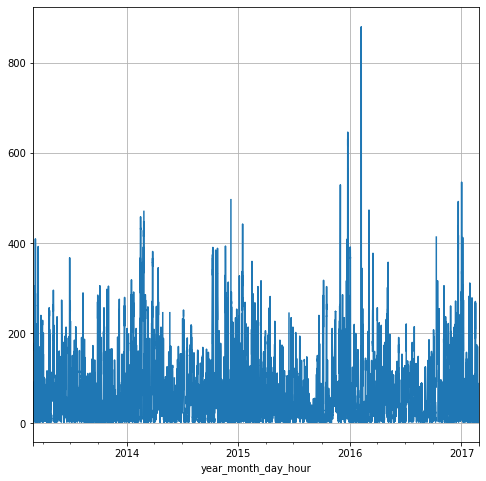

In [45]:
pm_data.plot(grid =True)

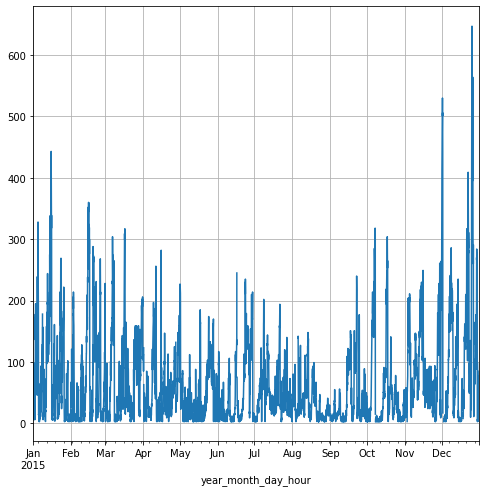

In [46]:
aq_df_2015 = aq_df.loc['2015']
pm_data_2015 = aq_df_2015['PM2.5']
pm_data_2015.plot(grid=True)

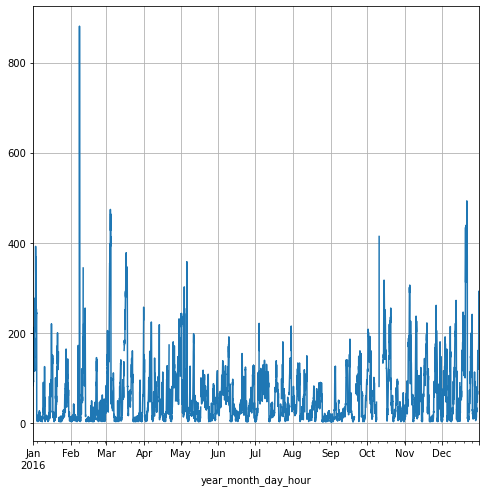

In [47]:
aq_df_2016 = aq_df.loc['2016']
pm_data_2016 = aq_df_2016['PM2.5']
pm_data_2016.plot(grid=True)

In [48]:
import plotly.express as px
fig = px.line(aq_df_non_indexed, x='year_month_day_hour', y='PM2.5', title='PM2.5 with slider')
fig.update_xaxes(rangeslider_visible=True)
fig.show()

In [53]:
fig = px.line(aq_df_non_indexed, x='year_month_day_hour', y='PM2.5', title='PM2.5 with slider')
fig.update_xaxes(
    rangeslider_visible=True,
    rangeselector=dict(
        buttons=list([
                     dict(count=1, label='1y', step='year', stepmode='backward'),
                     dict(count=2, label='2y', step='year', stepmode='backward'),
                     dict(count=3, label='3y', step='year', stepmode='backward'),
                     dict(step='all')
        ])
    )
)
fig.show()


Text(0.5, 1.0, 'Air Quality plot for 2014 & 2015')

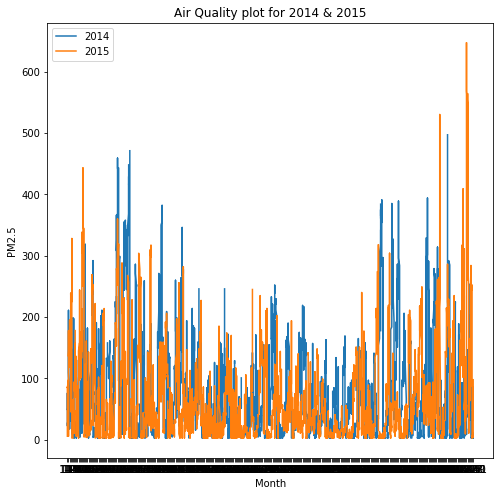

In [54]:
df_2014 = aq_df['2014'].reset_index()
df_2015 = aq_df['2015'].reset_index()
df_2014['month_day_hour'] = df_2014.apply(lambda x:str(x['month'])+"-"+x['day'], axis=1)
df_2015['month_day_hour'] = df_2015.apply(lambda x:str(x['month'])+"-"+x['day'], axis=1)
plt.plot(df_2014['month_day_hour'], df_2014['PM2.5'])
plt.plot(df_2015['month_day_hour'], df_2015['PM2.5'])
plt.legend(['2014','2015'])
plt.xlabel('Month')
plt.ylabel('PM2.5')
plt.title('Air Quality plot for 2014 & 2015')

In [57]:
aq_df['2014':'2016'][['month', 'PM2.5']].groupby('month').describe()

PM2.5                                                       
        count       mean         std  min   25%   50%     75%    max
month                                                               
1      2173.0  70.285274   75.913587  3.0  12.0  38.0  113.00  443.0
2      1978.0  86.389282  105.603069  3.0  10.0  33.0  132.00  881.0
3      2212.0  80.193852   87.889440  3.0  13.0  47.0  123.25  474.0
4      2105.0  67.963325   56.430235  3.0  25.0  54.0   95.00  346.0
5      2188.0  47.994378   44.843130  3.0  16.0  35.0   67.00  358.0
6      2119.0  46.655403   43.877349  3.0  13.0  31.0   69.00  245.0
7      2205.0  61.671474   50.926149  3.0  21.0  48.0   91.00  252.0
8      2206.0  41.364869   37.279312  3.0  13.0  29.0   60.00  217.0
9      2074.0  45.356123   43.235331  3.0  11.0  27.0   78.00  240.0
10     2081.0  82.586257   92.234361  3.0  13.0  43.0  124.00  414.0
11     2141.0  77.500140   71.720648  3.0  20.0  56.0  112.00  394.0
12     2186.0  87.990851  104.677021  3.0  11.0  48.5  135.00  647.0

In [58]:
aq_df['2014':'2016'][['month', 'PM2.5', 'TEMP']].groupby('month').agg({'PM2.5':['max'],'TEMP':['min','max']})

PM2.5  TEMP      
         max   min   max
month                   
1      443.0 -16.6  12.4
2      881.0 -10.9  14.0
3      474.0  -6.4  26.0
4      346.0   1.3  32.0
5      358.0   7.0  41.4
6      245.0  15.1  38.1
7      252.0  16.8  39.2
8      217.0  16.6  36.3
9      240.0   7.8  34.5
10     414.0  -1.4  28.1
11     394.0 -10.3  20.8
12     647.0  -9.7  11.6

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fc3cb5d4a20>,
      dtype=object)

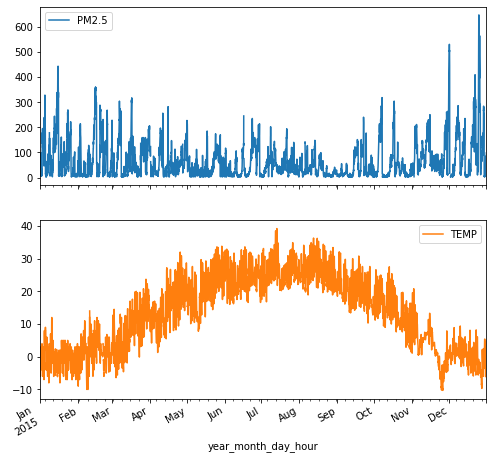

In [59]:
aq_df_2015=aq_df['2015']
pm_data_2015 = aq_df_2015[['PM2.5', 'TEMP']]
pm_data_2015.plot(subplots=True)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc3cbca2240>,
      dtype=object)

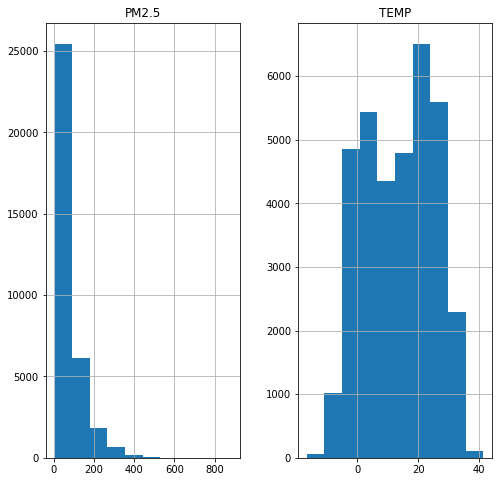

In [60]:
aq_df[['PM2.5','TEMP']].hist()

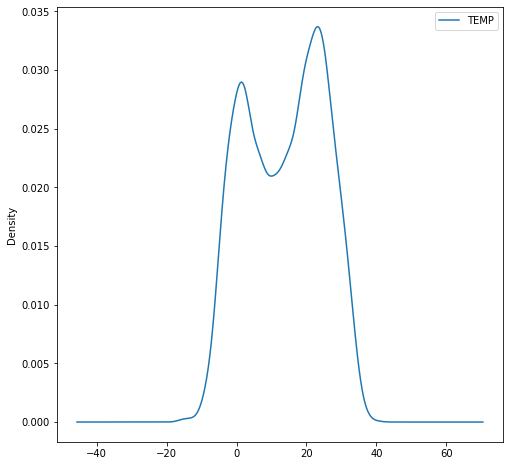

In [61]:
aq_df[['TEMP']].plot(kind='density')

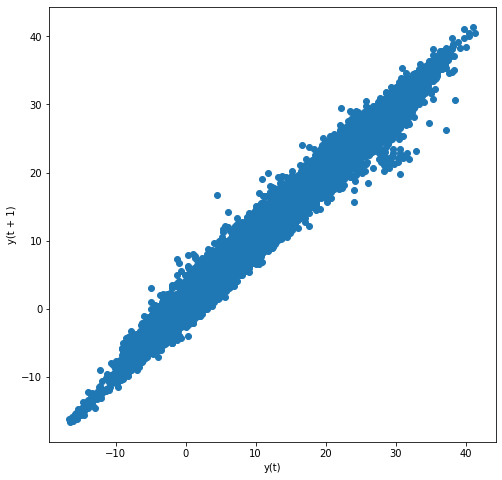

In [62]:
pd.plotting.lag_plot(aq_df['TEMP'], lag=1)

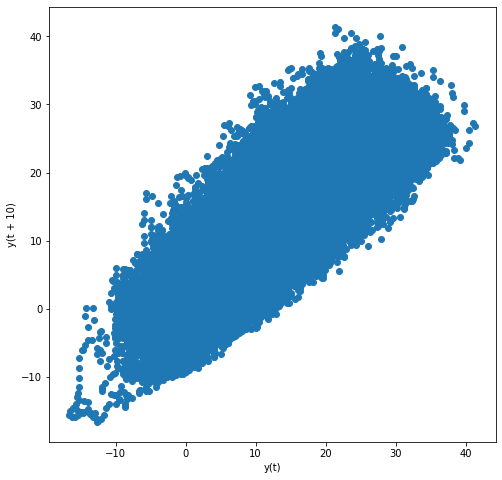

In [63]:
pd.plotting.lag_plot(aq_df['TEMP'], lag=10)

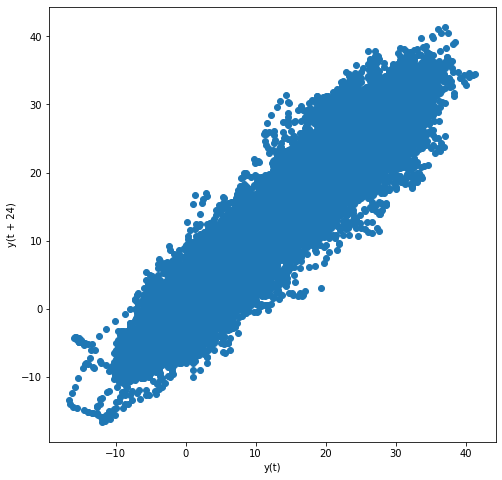

In [64]:
pd.plotting.lag_plot(aq_df['TEMP'], lag=24) #1day lag

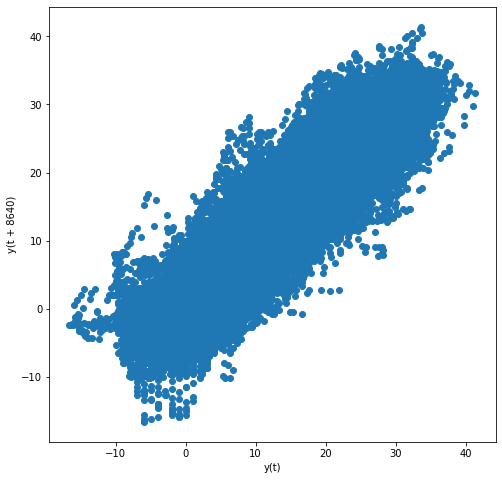

In [65]:
pd.plotting.lag_plot(aq_df['TEMP'], lag=8640) #1yr lag

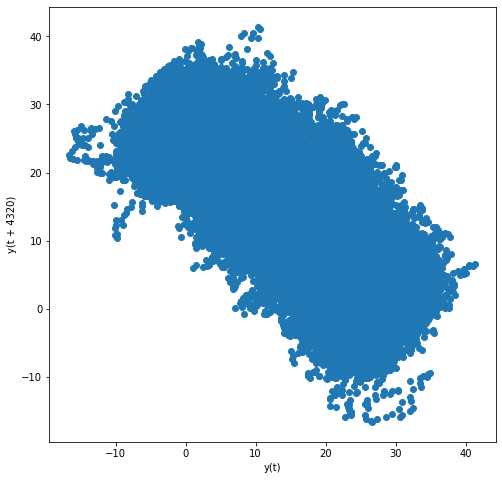

In [66]:
pd.plotting.lag_plot(aq_df['TEMP'], lag=4320) #6 months lag

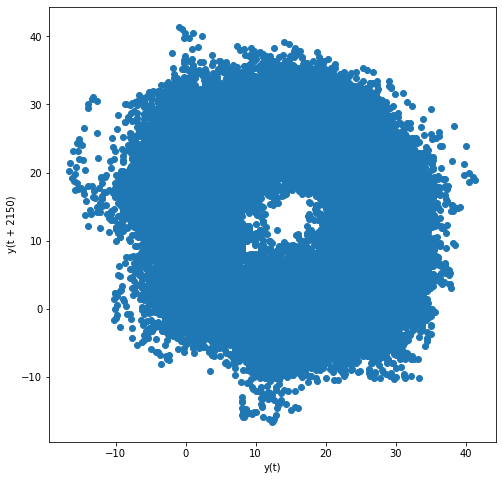

In [67]:
pd.plotting.lag_plot(aq_df['TEMP'], lag=2150)  #3 months lag

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fc3cb587898>,
      dtype=object)

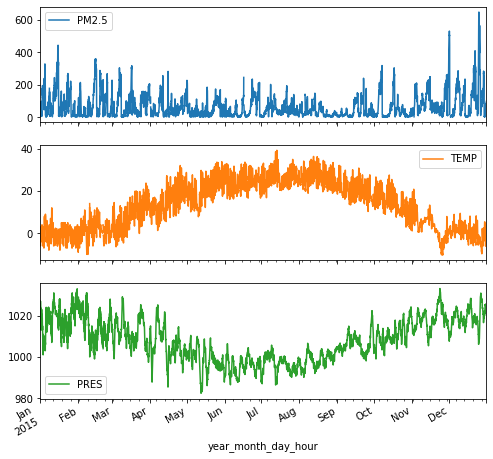

In [69]:
aq_df_2015 = aq_df['2015']
pm_data_2015 = aq_df_2015[['PM2.5', 'TEMP', 'PRES']]
pm_data_2015.plot(subplots=True)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fc3ca624be0>,
      dtype=object)

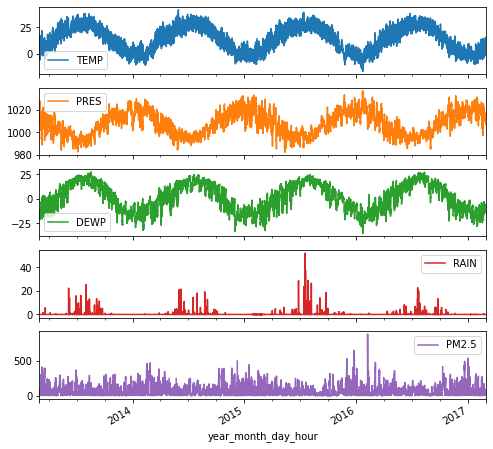

In [71]:
multi_data = aq_df[['TEMP','PRES', 'DEWP', 'RAIN', 'PM2.5']]
multi_data.plot(subplots=True)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fc3c7075160>,
      dtype=object)

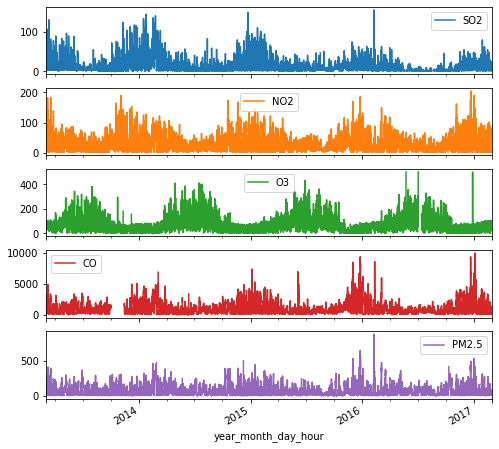

In [74]:
multi_data = aq_df[['SO2','NO2','O3','CO','PM2.5']]
multi_data.plot(subplots=True)

Text(0.5, 0, 'year_month_day_hour')

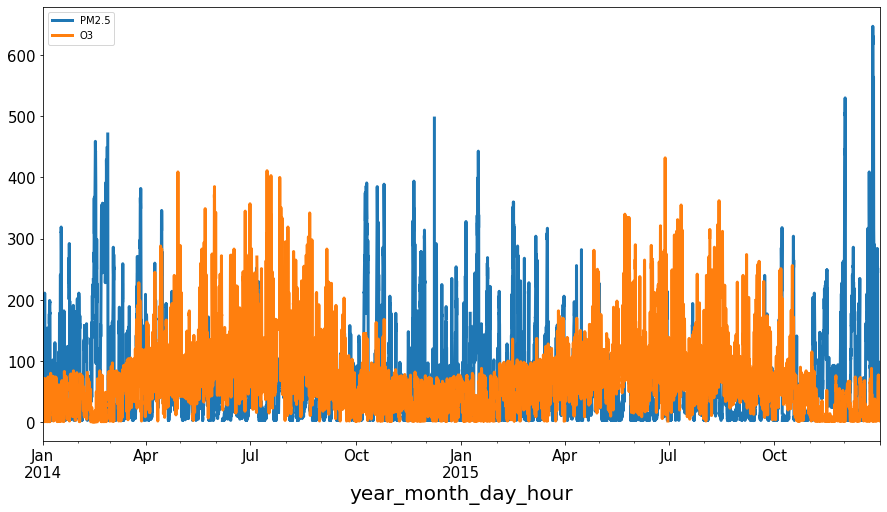

In [75]:
aq_df['2014':'2015'][['PM2.5', 'O3']].plot(figsize=(15,8), linewidth=3, fontsize=15)
plt.xlabel('year_month_day_hour', fontsize=20)

In [77]:
aq_df_2015['PM2.5']

year_month_day_hour
2015-01-01 00:00:00     NaN
2015-01-01 01:00:00     NaN
2015-01-01 02:00:00     NaN
2015-01-01 03:00:00     NaN
2015-01-01 04:00:00     NaN
                       ... 
2015-12-31 19:00:00    85.0
2015-12-31 20:00:00     NaN
2015-12-31 21:00:00    80.0
2015-12-31 22:00:00    93.0
2015-12-31 23:00:00    98.0
Name: PM2.5, Length: 8760, dtype: float64

In [78]:
aq_df_2015

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
year_month_day_hour,,,,,,,,,,,,,,,,,,
2015-01-01 00:00:00,16105,2015,1,1,0,NaN,NaN,NaN,NaN,NaN,NaN,-4.0,1025.0,-23.7,0.0,NW,3.3,Dingling
2015-01-01 01:00:00,16106,2015,1,1,1,NaN,NaN,NaN,NaN,NaN,NaN,-2.0,1022.0,-22.6,0.0,NNE,1.2,Dingling
2015-01-01 02:00:00,16107,2015,1,1,2,NaN,NaN,NaN,NaN,NaN,NaN,-5.0,1022.0,-23.5,0.0,NNW,1.7,Dingling
2015-01-01 03:00:00,16108,2015,1,1,3,NaN,NaN,NaN,NaN,NaN,NaN,-5.0,1023.0,-23.5,0.0,N,1.7,Dingling
2015-01-01 04:00:00,16109,2015,1,1,4,NaN,NaN,NaN,NaN,NaN,NaN,-5.0,1024.0,-24.0,0.0,NE,1.8,Dingling
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015-12-31 19:00:00,24860,2015,12,31,19,85.0,95.0,12.0,73.0,1200.0,2.0,-0.6,1021.0,-9.5,0.0,NE,0.6,Dingling
2015-12-31 20:00:00,24861,2015,12,31,20,NaN,109.0,32.0,79.0,2900.0,2.0,-1.8,1021.2,-9.9,0.0,NW,1.1,Dingling
2015-12-31 21:00:00,24862,2015,12,31,21,80.0,100.0,35.0,81.0,3200.0,2.0,-1.6,1020.8,-9.7,0.0,NE,0.9,Dingling


In [79]:
aq_df.isnull().values.any()

True

In [81]:
df.isnull().sum()

No            0
year          0
month         0
day           0
hour          0
PM2.5       779
PM10        656
SO2         730
NO2        1234
CO         2012
O3         1214
TEMP         53
PRES         50
DEWP         53
RAIN         51
wd          140
WSPM         43
station       0
dtype: int64

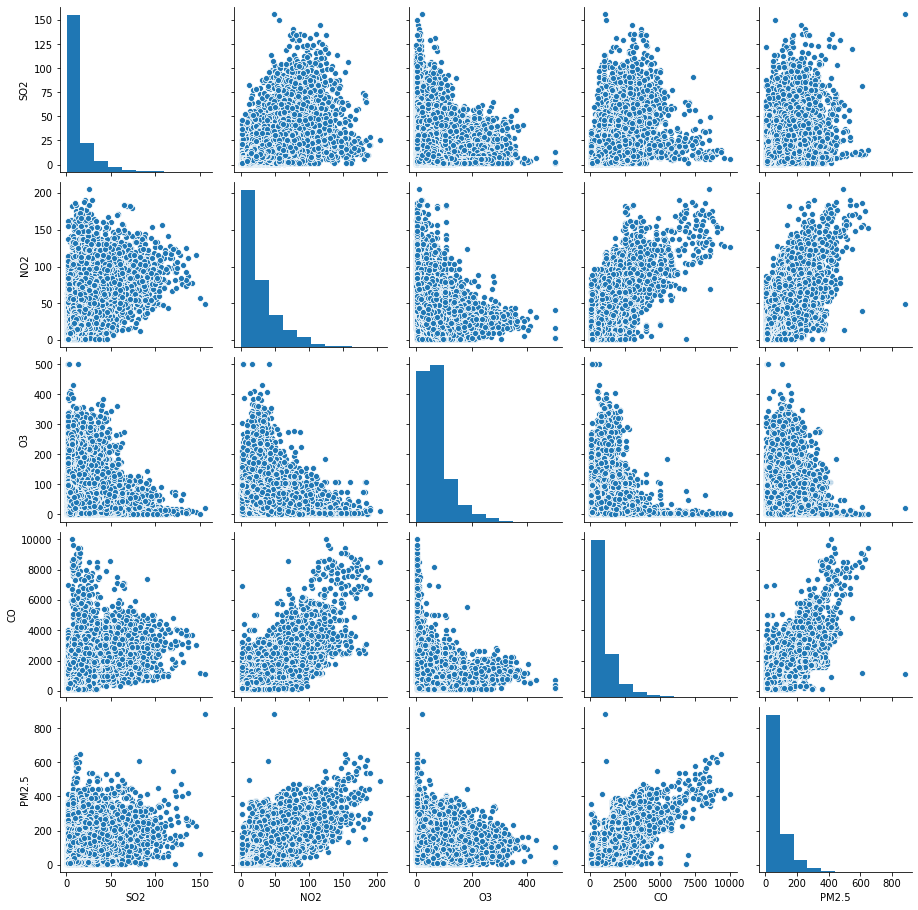

In [82]:
g = sns.pairplot(aq_df[['SO2','NO2','O3','CO','PM2.5']])

In [84]:
aq_corr= aq_df[['SO2','NO2','O3','PM2.5']].corr(method='pearson')
aq_corr

,SO2,NO2,O3,PM2.5
SO2,1.000000,0.610433,-0.182096,0.475117
NO2,0.610433,1.000000,-0.373625,0.718170
O3,-0.182096,-0.373625,1.000000,-0.100542
PM2.5,0.475117,0.718170,-0.100542,1.000000


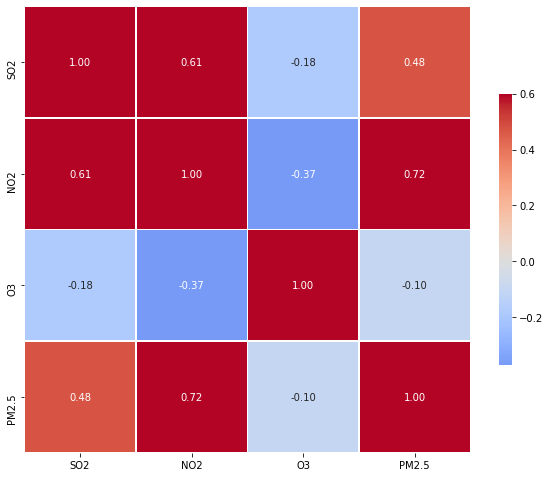

In [87]:
g = sns.heatmap(aq_corr, vmax=0.6, center=0,
                square=True, linewidths=0.5, cbar_kws={'shrink':0.5},
                annot=True, fmt='.2f', cmap='coolwarm')
g.figure.set_size_inches(10,10)
plt.show()

In [88]:
aq_df.groupby('wd').agg(median=('PM2.5','median'),
                        mean=('PM2.5','mean'),
                        max=('PM2.5','max'),
                        min=('PM2.5','min')).reset_index()

,wd,median,mean,max,min
0,E,70.0,88.623363,434.0,3.0
1,ENE,56.5,77.685514,647.0,3.0
2,ESE,78.5,96.492276,632.0,3.0
3,N,29.0,57.546221,536.0,3.0
4,NE,32.0,57.390083,530.0,3.0
5,NNE,26.0,53.946239,881.0,3.0
6,NNW,33.0,62.790775,548.0,3.0
7,NW,21.0,52.769116,535.0,3.0
8,S,52.0,72.497281,511.0,3.0
9,SE,70.0,85.045709,617.0,3.0


In [89]:
aq_df_na = aq_df.copy()
aq_df_na=aq_df_na.dropna()

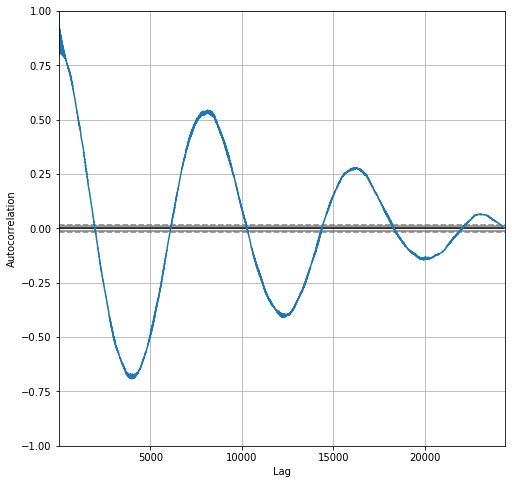

In [90]:
pd.plotting.autocorrelation_plot(aq_df_na['2014':'2016']['TEMP'])

In [ ]:
aq_df_na['TEMP'].resample('1m').mean()

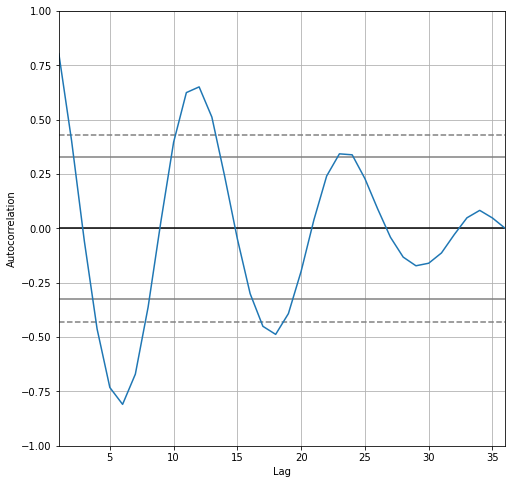

In [92]:
pd.plotting.autocorrelation_plot(aq_df_na['2014':'2016']['TEMP'].resample('1m').mean())

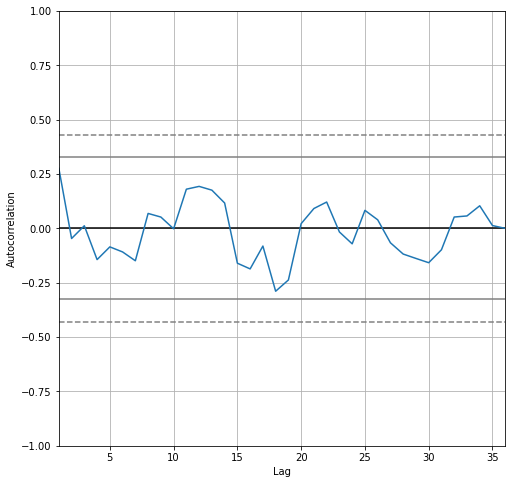

In [93]:
pd.plotting.autocorrelation_plot(aq_df_na['2014':'2016']['PM2.5'].resample('1m').mean())